# Give me some credit

https://www.kaggle.com/c/GiveMeSomeCredit/overview/evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Import given dataset
df = pd.read_csv('~/siai/GiveMeSomeCredit/cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [30]:
columns = df.columns
columns

Index(['SeriousDlqin2yrs', 'age', 'NumberOfDependents', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],
      dtype='object')

In [31]:
col_ordered = ['SeriousDlqin2yrs', 
           'age','NumberOfDependents','DebtRatio', 'MonthlyIncome',
           'NumberOfOpenCreditLinesAndLoans','RevolvingUtilizationOfUnsecuredLines','NumberRealEstateLoansOrLines',
           'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']

In [32]:
df = df[col_ordered]
df

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
0,1,45,2.0,0.802982,9120.0,13,0.766127,6,2,0,0
1,0,40,1.0,0.121876,2600.0,4,0.957151,0,0,0,0
2,0,38,0.0,0.085113,3042.0,2,0.658180,0,1,0,1
3,0,30,0.0,0.036050,3300.0,5,0.233810,0,0,0,0
4,0,49,0.0,0.024926,63588.0,7,0.907239,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,74,0.0,0.225131,2100.0,4,0.040674,1,0,0,0
149996,0,44,2.0,0.716562,5584.0,4,0.299745,1,0,0,0
149997,0,58,0.0,3870.000000,NaN,18,0.246044,1,0,0,0
149998,0,30,0.0,0.000000,5716.0,4,0.000000,0,0,0,0


In [33]:
'''df.columns = col_new
df
'''

'df.columns = col_new\ndf\n'

# Exploratory Data Analysis

아래는 데이터셋의 가장 기본적인 정보들을 파악해본 내용이다.
- **사이즈 및 자료형**: 데이터는 총 150,000 건이며, 4개 변수 외에 모두 정수형이다.
- **변수 구분**: 'Unnamed:0'열은 index로 변경 가능할듯하다. 해당 열 제거 시 총 1개의 종속변수 'SeriousDlqin2yrs'와 10개의 독립변수가 있다. (변수별 뜻 설명 생략)
- **결측값**: 'NumberOfDependents'와 'MonthlyIncome' 두 변수에서만 나타났다. 다른 변수의 경우 결측값은 발견되지 않았지만 0처리된 숫자 또는 outlier가 있는지 확인해보아야할듯하다.
- **변수의 단위** : DebtRatio와 같은 percentage 데이터와 대출 횟수 등을 나타낸 데이터가 함께 존재한다. 분명 스케일링이 필요할 것으로 보여진다.

변수별 간략한 특징 및 아이디어는 아래와 같다.
- **SeriousDlqnin2yrs**: 0,1로 이루어진 binary 데이터이다. 1의 경우 2년 내에 90일 이상 체납하여 delinquency에 해당할 경우를 의미한다.
- **age**: 0살부터 109살까지 포함되어 있다. 통상 미성년자는 대출을 받지 못할 것이고, 나이대별 대출을 받을 수 있는 기준이나 대출금액, 횟수 등이 달라질 수 있을듯하니 미국의 대출 가능 연령 및 관련 자료를 조사해보면 좋겠다.
- **NumberOfDependents**: 자기 자신을 제외한 부양가족의 수를 의미한다. 최대 20명까지 포함되어 있는데, 이는 분명 outlier일 것이다. 추가적으로 부양가족의 수가 얼마나 대출 및 채무불이행에 연관이 있을지 살펴볼 필요가 있겠다. 데이터를 단적으로 보고 떠올릴 수 있는 가설들을 나열하자면 아래와 같다.
    - 부양 가족의 수가 많을수록 가장의 책임이 막중하여 대출 상환율이 높을수도 있다.
    - 특정 국가에서는 빈곤층일수록 교육 수준이 낮아 피임을 하지 않거나 경제적 상황을 덜 고려하여 아이들을 출산하는 경우도 있는 것으로 안다. 이러한 맥락을 고려하면 부양 가족의 수가 많을수록 가장의 책임감이 낮고, 이에 따른 채무불이행의 비율이 높아질수도 있겠다.
    - 부양 가족의 수가 0일 경우는 1인 가구 또는 2인 딩크족일 수 있다. 해당 경우에는 자녀출산을 통한 가정을 지향하기보다 개인의 폭넓은 자유를 지향하는 경우일 수 있다. 이 때에는 무리한 대출 및 채무불이행의 확률이 낮을지도 모른다.
- **DebtRatio**: 월소득 대비 대출금 등의 비율을 나타낸 비율 데이터인데 최대값이 329664라고 나왔다. 정수 또는 퍼센트로 해석할 수 있을 텐데, 두 경우 모두 일반적인 비율의 범위는 훨씬 넘어가는 숫자로 보인다. (비율 데이터라면 100%일 때 1, 많아도 자기 자산의 300% 등의 숫자가 나왔을 것 같은데, 자기 자산의 33만배는 과도해보인다.) 즉, 단순히 활용하기보다 스케일링작업이 필요할 것으로 보인다.
- **부채 현황 변수**:아래 변수 세가지는 현재 보유하고 있는 다양한 유형의 부채를 나타내주는 변수들이다. 다만 총 금액이 얼마인지 알 수 없고 개수로 나타내고 있어 한계가 있을 수 있겠다. 다만 현실에서 3억짜리 대출 1건을 보유한 경우와 5000만원짜리 대출을 6건 보유한 경우라면 전자의 대출 기준이 훨씬 높을 것으로 예상된다. 따라서 전자의 경우가 체납할 확률이 낮을 수 있겠다고 유추해볼 수 있다.
    - NumberOfOpenCreditLinesAndLoans
    - RevolvingUtilizationOfUnsecuredLines
    - NumberRealEstateLoansOrLines
- **체납 현황 변수**:아래 변수 세가지는 30-59일, 60-90일, 90일 범위 또는 그 이상 체납한 횟수를 표기하고 있다. 아래와 같은 기간으로 나눈 이유가 있는지 궁금하다.
    - NumberOfTime30-59DaysPastDueNotWorse
    - NumberOfTime60-89DaysPastDueNotWorse
    - NumberOfTimes90DaysLate 


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   age                                   150000 non-null  int64  
 2   NumberOfDependents                    146076 non-null  float64
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         120269 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfTimes90DaysLate               150000 non-null  int64  
dtype

In [35]:
df.describe()

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.000000,150000.000000,146076.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,52.295207,0.757222,353.005076,6.670221e+03,8.452760,6.048438,1.018240,0.421033,0.240387,0.265973
std,0.249746,14.771866,1.115086,2037.818523,1.438467e+04,5.145951,249.755371,1.129771,4.192781,4.155179,4.169304
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.029867,0.000000,0.000000,0.000000,0.000000
50%,0.000000,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.154181,1.000000,0.000000,0.000000,0.000000
75%,0.000000,63.000000,1.000000,0.868254,8.249000e+03,11.000000,0.559046,2.000000,0.000000,0.000000,0.000000
max,1.000000,109.000000,20.000000,329664.000000,3.008750e+06,58.000000,50708.000000,54.000000,98.000000,98.000000,98.000000


In [36]:
df.nunique()

SeriousDlqin2yrs                             2
age                                         86
NumberOfDependents                          13
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
RevolvingUtilizationOfUnsecuredLines    125728
NumberRealEstateLoansOrLines                28
NumberOfTime30-59DaysPastDueNotWorse        16
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfTimes90DaysLate                     19
dtype: int64

<AxesSubplot:>

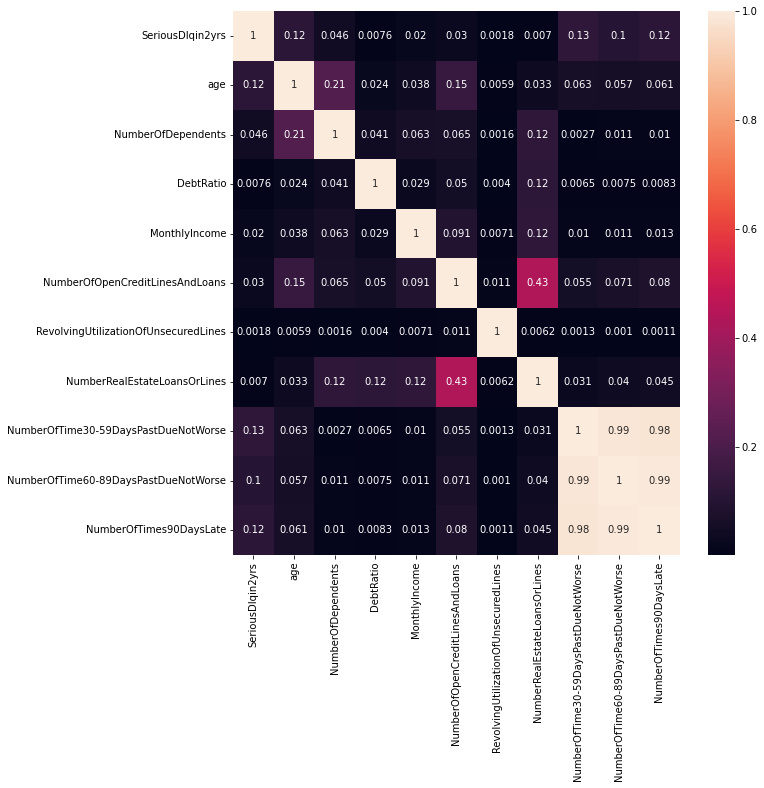

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), annot=True)

# Research

EDA를 변수별로 깊이 진행하기 전에 앞서 관련 내용들을 **역사적 맥락, 기술적 맥락, 변수들의 현실 사용 여부**를 중점으로 조사하였다. 
- **역사적 맥락**: 현시점 (2022년 1월)은 이미 2011년으로부터 11년이 지난 상태로 2007-8년의 경제 위기, 이후 뒤따른 침체기, 그리고 회복기까지 다양한 데이터와 분석을 찾아볼 수 있었고, 당시의 경제 위기로 인해 생긴 규제와 그 규제의 이행 상황을 다룬 글 또한 찾아볼 수 있었다. 
- **기술적 맥락**: 통상 신용평가에 사용되는 분석 방법이나 알고리즘을 알아보기 위해 신용평가 알고리즘, credit scoring 등을 리서치한 결과 CGAP에서 발행한 가이드북을 찾아볼 수 있었다. Classification이 주로 사용되며, logistic regression, decision tree 등이 예시로 소개되었다. 실제 신용평가사나 금융기관에서 사용되는 모델은 다를 수 있으나 본질적으로는 binary choice의 classification 문제임을 파악하였다.
- **변수**: 주어진 데이터셋의 정보들이 실제 신용평가 알고리즘에도 사용되는 것인지, 주어진 변수들 외에도 어떤 변수들을 주로 사용하는지 알아보았다. 그 결과 나이 및 소득 데이터는 충분히 사용될 것으로 예상되었는데, 'DebtRatio'의 경우 'DTI(Debt-to-Income ratio)'라는 이름으로 활용되고 있었다. 나아가 인구통계학적 지표로는 교육 수준, 가장의 성별, 기혼 여부, 그리고 금융지표로는 대출시점 등이 소득과 부채 관련 데이터를 분석하는데에 사용됨을 알 수 있었다.

중점적으로 참고한 자료 및 자료별 발견한 세부 내용은 아래와 같다.
### 1. [Ability to Repay a Mortgage: Assessing the Relationship Between Default, Debt-to-Income](https://www.dallasfed.org/research/economics/2020/0324)
- **채무 불이행 판단 기준**: Dallasfed 웹사이트의 기사를 살펴보면, 채무 불이행의 정의를 대출시점 3년 이내에 최소 90일 이상 체납할 경우로 정의함을 알 수 있었다. 통상적으로 금융 기관에서 활용하는 지표로 보이며 이 사실을 GMSC데이터에 적용하면 'SeriousDlqnin2yrs'의 2년 또한 대출 시점을 의미하는 것으로 파악할 수 있었다.
    - **DebtRatio**: DTI(Debt-to-Income)이라는 명칭으로 실제로 연방정부 등에서 사용되고 있으며, 본 article은 2000년부터 2012년까지의 데이터 등을 활용하여 DTI ratio의 추이를 살펴본 내용을 포함한다.
    - DTI Ratio가 클수록 대출시점으로부터 3년 이내에 90일 이상 체납하는 비중이 높았으며, 특히 2000년부터 2004년까지는 연체자의 비율이 점차 증가하다가 2008년 low DTI ratio와 high DTI ratio 대출자 간의 채무 불이행 비율이 약 4배가량 차이나는 것을 주목하였다. 2012년에는 이 비율이 급감하여 2000년보다도 high middle low그룹이 모두 줄어든 양상을 보였고 이는 채무자가 파산하거나 소비를 대폭 줄인 것으로 추정하였다.
    - 2014년 의회에서 모기지를 DTI를 43이하인 대출자에게만 제공하는 법안을 통과시킨듯하나 본 기사(2020년에 작성)에는 아직까지도 이행되지 않는 부분들이 있다고 한다. 

### 2. [CGAP:Credit scoring in fiancial inclusion](https://www.cgap.org/sites/default/files/publications/2019_07_Technical_Guide_CreditScore.pdf)
- 금융기관 등을 대상으로 기존의 채무자 데이터를 기반으로 신용평가 분석 및 모델링 방법을 제안하는 자료이다.
- 기본적으로 신용 평가는 classification모델을 활용하며, 이에 따라 Binary logistic regression, decision tree 등을 모델로서 소개한다
- 추가적으로 예시로 사용된 Age, Income level, Number of Credit card 변수에 따른 부채율과의 상관관계는 나이가 어릴수록, 소득구간이 높을수록 부채율이 높았고, 신용카드 보유 수 또는 신용지불 금액이 클수록 상환율이 낮은것으로 언급되었다.

### 3. [Income, Poverty and Health Insurance Coverage in the United States: 2011](https://www.census.gov/newsroom/releases/archives/income_wealth/cb12-172.html)
- 미국 인구조사국이 분석한 소득, 빈곤 및 건강보험 적용 범위에 관련한 리포트이다. 주로 2010년 대비 2011년의 변화를 다루고 있다.
- 나이, 성별, 가장의 성별, 가구의 규모, 인종별 빈곤층 비율, 소득 현황 및 재정적 안정성 등을 다양하게 분석 및 요약하여 소개하는 자료이다. 부채 관련 정보를 직접적으로 연결하여 설명하고 있지는 않지만 2차적 자료로 참고할 수 있을 인사이트들이 포함되어 있다.
    
### 4. [Demographics of Debt](https://www.debt.org/faqs/americans-in-debt/demographics/)
- 국가기관은 아니지만 2021년 말 미국의 부채 관련 현황을 다양한 관점으로 축약한 글이다. 교육 수준, 나이, 가족의 유형에 따른 평균 소득 수준과 소득 수준별 평균 부채 금액 등의 정보를 포함하고 있다. 특히 흥미로운 지표들은 아래와 같다.
    - 교육 수준별 평균 소득 금액 현황:
        - Less than a high school diploma – \$30,784
        - High school education – \$38,792
        - Attended some college – \$43,316
        - Two-year college degree – \$46,124
        - Bachelor’s degree – \$64,896
        - Master’s degree – \$77,844
        - Doctorate degree – \$97,916
    - 나이대별 평균 소득 금액 현황:
        - Gen Z (ages 18 to 23): \$16,043
        - Millennials (ages 24 to 39): \$87,448
        - Gen X (ages 40 to 55): \$140,643
        - Baby boomers (ages 56 to 74): \$97,290
        - Silent generation (ages 75 and above): \$41,281
    - 가족 유형별 재정적 안정성 현황: 싱글보다 결혼한 부부일수록 저축금액이 높았고, 금전적으로 안정성을 느끼고 있다고 답함. (35-44세 기준, 2017년 study)
    - DTI 현황: 모기지를 받기 위해 필요한 최대 DTI는 43%로 정의, 대부분의 금융 어드바이저는 30%를 권장. 80년대부터 DTI는 천천히 오르다가 2000년대 초 급증하였고, 2008년 금융위기와 함께 급락, 대다수의 가계가 지출을 줄이거나 default한걸로 파악하고 있음. (상단의 1번 기사와 동일한 분석이다.)
    - 소득 구간별 부채 금액 현황: 소득구간이 높을수록 부채금액이 높은 것으로 확인됨. 다만 저임금의 경우 부채율이 10%에 해당했다면, \$290,000 그룹의 경우 평균 부채는 \$12,600 으로 0.04\%에 해당. 소득대비 부채비율 자체가 상당히 줄어드는 것으로 보임.
  

## Hypotheses
위에서 조사한 내용을 바탕으로 몇가지 가설을 나열해보았다.
- 소득과 부채율은 양의 상관관계를 가질 것이다
    - 소득과 부채율이 양의 상관관계를 가지더라도, 상환율은 소득이 높을수록 더 높을 수 있음. (상환을 잘하는 사람이라면 부채율이 높아도 금융기관 입장에서는 VIP로 대우해야할 것. 즉, 해당 비율은 신용점수를 줄 때 높은 점수를 부여할 수 있다.)
    - 소득을 continuous하게 써서는 유의미한 인사이트를 얻기 어려울 것이다. Discretization한다면 적절한 구간은 어떻게 지정해야할까?
- 나이가 많을수록 부채율이 높을까? 나이가 어릴수록 부채율이 높을까? (확인 필요)

추가적으로 아래는 SeriousDlqin2yrs가 1인 경우 다른 변수들의 통계치들을 살펴본 내용이다.


In [38]:
df.loc[df["SeriousDlqin2yrs"]==1].describe()

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,10026.0,10026.000000,9847.000000,10026.000000,8357.000000,10026.000000,10026.000000,10026.000000,10026.00000,10026.000000,10026.000000
mean,1.0,45.926591,0.948208,295.121066,5630.826493,7.882306,4.367282,0.988530,2.38849,1.828047,2.091362
std,0.0,12.916289,1.219367,1238.360283,6171.719674,5.653601,131.835778,1.425723,11.73451,11.753068,11.762760
min,1.0,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.0,36.000000,0.000000,0.193979,2963.000000,4.000000,0.398219,0.000000,0.00000,0.000000,0.000000
50%,1.0,45.000000,0.000000,0.428227,4500.000000,7.000000,0.838853,1.000000,0.00000,0.000000,0.000000
75%,1.0,54.000000,2.000000,0.892371,6800.000000,11.000000,1.000000,2.000000,2.00000,1.000000,1.000000
max,1.0,101.000000,8.000000,38793.000000,250000.000000,57.000000,8328.000000,29.000000,98.00000,98.000000,98.000000


## 변수 분석: Age

통상 나이를 가장 단순하게 분석할 때에는 10살 단위로 끊어서 구분하지만, 구간별 추이를 파악하기 위해 5 구간으로 나누어보았다. 나이는 미성년인 0\~18세(1), 청년인 18\~35세(2), 중년인 35\~50세(3), 장년인 50\~65세(4), 은퇴 시점인 65세 이상(5)으로 임의로 나누었다.

5개의 분위로 나이를 나누어 값을 확인한 결과, 3그룹이 평균 1.25명의 자녀를 가지고 있어 가장 많았고, 4그룹이 DebtRatio와 소득 모두 가장 높았다. Revolving의 경우 3그룹이 가장 많이 쓰는 것으로 확인되었고, 90일을 넘겨 체납한 횟수는 평균적으로 2그룹이 가장 많았다.  

대략적으로 파악했지만 나이별로 각 변수의 평균치의 차이가 있는것으로 보아 나이 구간을 어떻게 구분하는지가 모델링에 중요한 요소 중 하나일 것으로 파악하였다.



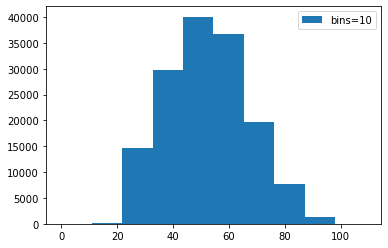

In [39]:
plt.hist(df["age"], label = 'bins=10')
plt.legend()
plt.show()

In [40]:
df.loc[df["age"] == 0]

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
65695,0,0,2.0,0.436927,6000.0,6,1.0,2,1,0,0


In [41]:
df.loc[df["age"] > 65]

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
5,0,74,1.0,0.375607,3500.0,3,0.213179,1,0,0,0
14,0,76,0.0,477.000000,0.0,6,0.019657,1,0,0,0
16,0,78,0.0,2058.000000,NaN,10,0.061086,2,0,0,0
27,0,69,1.0,0.042383,2500.0,17,0.034421,0,0,0,0
37,0,75,1.0,0.134078,3400.0,1,1.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
149971,0,83,0.0,0.013997,5000.0,6,0.058001,0,0,0,0
149976,0,76,0.0,60.000000,NaN,5,0.000627,0,0,0,0
149983,0,82,0.0,0.000800,5000.0,5,0.002485,0,0,0,0
149984,0,84,0.0,25.000000,NaN,5,0.037548,0,0,0,0


In [42]:
df.loc[(df["age"] > 18) & (df["age"] < 35)].count()

SeriousDlqin2yrs                        19239
age                                     19239
NumberOfDependents                      18710
DebtRatio                               19239
MonthlyIncome                           16463
NumberOfOpenCreditLinesAndLoans         19239
RevolvingUtilizationOfUnsecuredLines    19239
NumberRealEstateLoansOrLines            19239
NumberOfTime30-59DaysPastDueNotWorse    19239
NumberOfTime60-89DaysPastDueNotWorse    19239
NumberOfTimes90DaysLate                 19239
dtype: int64

In [43]:
df['age_c'] = df['age']

In [44]:
df['age_c'].loc[(df['age'] >= 0) | (df['age'] < 18)] = '1'
df['age_c'].loc[(df['age'] >= 18) & (df['age'] < 35)] = '2'
df['age_c'].loc[(df['age'] >= 35) & (df['age'] < 50)] = '3'
df['age_c'].loc[(df['age'] >= 50) & (df['age'] < 65)] = '4'
df['age_c'].loc[df['age'] >= 65] = '5'

<AxesSubplot:xlabel='age_c'>

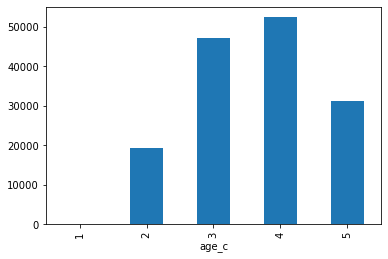

In [45]:
df.groupby('age_c').size().plot(kind='bar')

In [46]:
df.groupby(df['age_c']).mean()

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
age_c,,,,,,,,,,,
1,0.000000,0.000000,2.000000,0.436927,6000.000000,6.000000,1.000000,2.000000,1.000000,0.000000,0.000000
2,0.111752,29.407454,0.520577,133.622422,4035.415599,5.672176,5.215706,0.445241,1.123707,0.968346,1.029575
3,0.086931,42.679960,1.250891,344.497675,6898.250075,8.280372,8.675118,1.152945,0.410068,0.186907,0.220212
4,0.057147,56.878896,0.708891,444.858372,7704.719085,9.572750,5.268794,1.230649,0.332812,0.135906,0.153874
5,0.025070,73.240855,0.211748,346.805028,6277.341638,8.545988,3.902935,0.811047,0.152470,0.047831,0.052576


추가적으로 데이터의 분포에 따라 quintile로 5분위를 나눈다음 각 그룹별 변수의 평균치를 살펴보았다.  그 결과, 위에서 임의로 나눈 구간처럼 0살을 제외한 가장 나이가 어렸던 2그룹이 y=1인 비율이 33%로 가장 높았다. 이는 나이가 어릴수록 채무 불이행의 확률이 높을 가능성이 있음을 시사한다. (추가 검증 필요)

In [47]:
df['age_q'] = pd.qcut(df['age'], 5, labels=False)
df

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,age_c,age_q
0,1,45,2.0,0.802982,9120.0,13,0.766127,6,2,0,0,3,1
1,0,40,1.0,0.121876,2600.0,4,0.957151,0,0,0,0,3,1
2,0,38,0.0,0.085113,3042.0,2,0.658180,0,1,0,1,3,0
3,0,30,0.0,0.036050,3300.0,5,0.233810,0,0,0,0,2,0
4,0,49,0.0,0.024926,63588.0,7,0.907239,1,1,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,74,0.0,0.225131,2100.0,4,0.040674,1,0,0,0,5,4
149996,0,44,2.0,0.716562,5584.0,4,0.299745,1,0,0,0,3,1
149997,0,58,0.0,3870.000000,NaN,18,0.246044,1,0,0,0,4,3
149998,0,30,0.0,0.000000,5716.0,4,0.000000,0,0,0,0,2,0


<AxesSubplot:xlabel='age_q'>

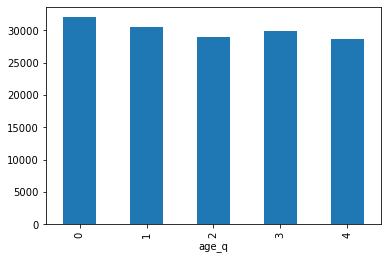

In [48]:
df.groupby('age_q').size().plot(kind='bar')

In [49]:
df.groupby(df['age_q']).mean()

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
age_q,,,,,,,,,,,
0,0.105299,32.488814,0.757926,196.264406,4839.484857,6.463130,7.870040,0.666979,0.837958,0.663761,0.717379
1,0.083988,44.203045,1.316882,364.837108,7163.061988,8.415357,8.085012,1.199443,0.413654,0.183988,0.214244
2,0.071522,52.438361,0.973453,404.106800,7785.420443,9.427927,6.180331,1.267700,0.390737,0.166529,0.190220
3,0.044404,60.896334,0.480330,502.369396,7583.443805,9.665258,4.182217,1.193145,0.279002,0.108763,0.122212
4,0.024127,73.988321,0.200355,308.156938,6180.065947,8.464876,3.646935,0.782160,0.141194,0.039057,0.042869


In [50]:
df.groupby(['age_q', 'SeriousDlqin2yrs']).size() 

age_q  SeriousDlqin2yrs
0      0                   28634
       1                    3370
1      0                   27975
       1                    2565
2      0                   26963
       1                    2077
3      0                   28493
       1                    1324
4      0                   27909
       1                     690
dtype: int64

In [53]:
total_y = df['SeriousDlqin2yrs'].sum()

In [54]:
df.groupby('age_q')['SeriousDlqin2yrs'].sum() / total_y

age_q
0    0.336126
1    0.255835
2    0.207161
3    0.132057
4    0.068821
Name: SeriousDlqin2yrs, dtype: float64

<AxesSubplot:xlabel='age_q', ylabel='SeriousDlqin2yrs'>

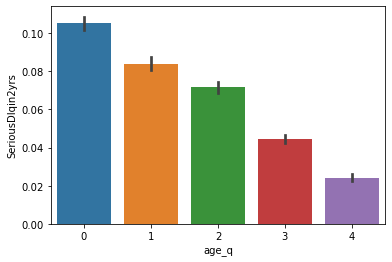

In [55]:
sns.barplot(data=df, x="age_q", y="SeriousDlqin2yrs")

<AxesSubplot:xlabel='age_c', ylabel='SeriousDlqin2yrs'>

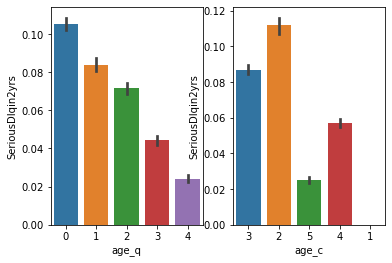

In [56]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
sns.barplot(data=df, x="age_q", y="SeriousDlqin2yrs", ax=ax1)
sns.barplot(data=df, x="age_c", y="SeriousDlqin2yrs", ax=ax2)

## 변수 분석: MonthlyIncome

In [57]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [58]:
df['MonthlyIncome'].nunique()

13594

In [59]:
MIncome = df['MonthlyIncome'].unique()

In [60]:
sorted(MIncome)

[0.0,
 1.0,
 2.0,
 4.0,
 21.0,
 25.0,
 56.0,
 72.0,
 100.0,
 151.0,
 179.0,
 200.0,
 250.0,
 251.0,
 280.0,
 300.0,
 303.0,
 325.0,
 333.0,
 350.0,
 372.0,
 400.0,
 404.0,
 420.0,
 450.0,
 451.0,
 466.0,
 524.0,
 533.0,
 550.0,
 558.0,
 560.0,
 600.0,
 611.0,
 615.0,
 620.0,
 623.0,
 650.0,
 661.0,
 666.0,
 700.0,
 707.0,
 718.0,
 726.0,
 737.0,
 750.0,
 758.0,
 760.0,
 764.0,
 782.0,
 784.0,
 790.0,
 800.0,
 801.0,
 803.0,
 820.0,
 830.0,
 833.0,
 841.0,
 847.0,
 850.0,
 862.0,
 864.0,
 865.0,
 869.0,
 875.0,
 885.0,
 890.0,
 898.0,
 900.0,
 902.0,
 910.0,
 913.0,
 925.0,
 928.0,
 929.0,
 939.0,
 950.0,
 960.0,
 981.0,
 984.0,
 1000.0,
 1002.0,
 1015.0,
 1016.0,
 1020.0,
 1023.0,
 1027.0,
 1031.0,
 1036.0,
 1047.0,
 1050.0,
 1081.0,
 1082.0,
 1084.0,
 1089.0,
 1096.0,
 1100.0,
 1101.0,
 1105.0,
 1107.0,
 1109.0,
 1111.0,
 1112.0,
 1120.0,
 1122.0,
 1126.0,
 1142.0,
 1148.0,
 1150.0,
 1152.0,
 1160.0,
 1162.0,
 1168.0,
 1169.0,
 1181.0,
 1187.0,
 1198.0,
 1200.0,
 1201.0,
 1206.0,
 121

In [61]:
df['MonthlyIncome'].sort_values(by = MIncome, ascending = True)

TypeError: sort_values() got an unexpected keyword argument 'by'

In [ ]:
df['MonthlyIncome'].isna().sum()

In [ ]:
df['income_r'] = df['MonthlyIncome'].round(5)

In [ ]:
df['income_r'].describe()

In [ ]:
df_income = df[df['MonthlyIncome'].notnull()]

In [ ]:
sns.distplot(df_income)

In [62]:
df['income_q'] = pd.qcut(df['MonthlyIncome'], 5, labels=False)
df

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,age_c,age_q,income_q
0,1,45,2.0,0.802982,9120.0,13,0.766127,6,2,0,0,3,1,4.0
1,0,40,1.0,0.121876,2600.0,4,0.957151,0,0,0,0,3,1,0.0
2,0,38,0.0,0.085113,3042.0,2,0.658180,0,1,0,1,3,0,1.0
3,0,30,0.0,0.036050,3300.0,5,0.233810,0,0,0,0,2,0,1.0
4,0,49,0.0,0.024926,63588.0,7,0.907239,1,1,0,0,3,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,74,0.0,0.225131,2100.0,4,0.040674,1,0,0,0,5,4,0.0
149996,0,44,2.0,0.716562,5584.0,4,0.299745,1,0,0,0,3,1,2.0
149997,0,58,0.0,3870.000000,NaN,18,0.246044,1,0,0,0,4,3,NaN
149998,0,30,0.0,0.000000,5716.0,4,0.000000,0,0,0,0,2,0,2.0


In [63]:
df.groupby(df['income_q']).mean()

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,age_q
income_q,,,,,,,,,,,,
0.0,0.090775,48.428480,0.539188,126.250563,1884.715596,6.540145,2.554681,0.520252,0.672301,0.502791,0.550989,1.633153
1.0,0.085954,50.802250,0.714515,0.374171,3809.926815,7.886032,4.037690,0.772107,0.401190,0.207175,0.251086,1.790610
2.0,0.070125,51.480401,0.849275,0.355831,5408.248576,8.906056,4.741972,1.015671,0.285904,0.083884,0.103629,1.850896
3.0,0.055306,51.994810,1.002201,0.333310,7584.749502,9.687760,4.222312,1.279397,0.291272,0.085409,0.095084,1.900764
4.0,0.045046,53.847377,1.161740,0.288786,14756.350291,10.831765,14.019925,1.696586,0.246503,0.047169,0.045920,2.112323


In [64]:
df.loc[df['income_q'] == 0.0].describe()

,SeriousDlqin2yrs,age,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,age_q,income_q
count,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.000000,25084.0
mean,0.090775,48.428480,0.539188,126.250563,1884.715596,6.540145,2.554681,0.520252,0.672301,0.502791,0.550989,1.633153,0.0
std,0.287295,17.579137,0.962074,922.636155,898.184688,4.497252,107.660156,0.783372,6.436272,6.420596,6.432522,1.565972,0.0
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,33.000000,0.000000,0.110276,1330.000000,3.000000,0.032648,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,47.000000,0.000000,0.352023,2083.000000,6.000000,0.232216,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,0.000000,62.000000,1.000000,0.833628,2600.000000,9.000000,0.807497,1.000000,0.000000,0.000000,0.000000,3.000000,0.0
max,1.000000,103.000000,10.000000,61106.500000,3000.000000,42.000000,7809.000000,11.000000,98.000000,98.000000,98.000000,4.000000,0.0


In [70]:
df.groupby('income_q')['SeriousDlqin2yrs'].sum() / total_y

income_q
0.0    0.227110
1.0    0.197387
2.0    0.168263
3.0    0.132855
4.0    0.107919
Name: SeriousDlqin2yrs, dtype: float64

In [71]:
df['income_c'].loc[(df['MonthlyIncome'] >= 0) | (df['age'] < 18)] = '1'
df['age_c'].loc[(df['age'] >= 18) & (df['age'] < 35)] = '2'
df['age_c'].loc[(df['age'] >= 35) & (df['age'] < 50)] = '3'
df['age_c'].loc[(df['age'] >= 50) & (df['age'] < 65)] = '4'
df['age_c'].loc[df['age'] >= 65] = '5'

KeyError: 'income_c'

In [ ]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
sns.barplot(data=df, x="income_q", y="SeriousDlqin2yrs", ax=ax1)
sns.barplot(data=df, x="MonthlyIncome", y="SeriousDlqin2yrs", ax=ax2)

AttributeError: 'Rectangle' object has no property 'labels'

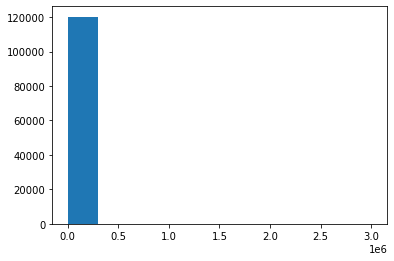

In [68]:
plt.hist(df['MonthlyIncome'], labels = 'bins=50')
plt.legend()
plt.show()

In [ ]:
df.loc[df['MonthlyIncome'] <10000].count()